In [18]:
import os, glob

from itertools import product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

from collections import defaultdict

from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import seaborn as sns
sns.set_style('whitegrid')

from packaging import version

rcParams['figure.figsize'] = 11.7, 8.27
rcParams['font.size'] = 11

In [6]:
def read_tb_summary(summary_root: str, tags: [str]) -> dict:

    output_data = defaultdict(list)
    summary_paths = glob.glob(os.path.join(summary_root, 'events*.*'))
    found_tags = {t: False for t in tags}

    for summary_path in summary_paths:
        acc = EventAccumulator(summary_path).Reload()
        for tag in tags:
            try:
                output_data[tag].extend(acc.Scalars(tag=tag))
                found_tags[tag] = True
            except KeyError as e:
                continue

    for t, found in found_tags.items():
        if not found:
            print(f'Key {t} not found in {summary_root}')

    return output_data


In [34]:
exp_root = os.path.join('experiments', 'fm_test_mel', 'tensorboard', '')

fft_sizes = [64, 128, 256, 512, 1024, 2048]
spec_types = ['mel', 'spectrogram']
ops = ['delta_freq', 'delta_time', 'emd', 'logmag', 'magnitude']

tags = [f'weighted_sub_losses/{size}_{spec_type}_{op}' for size, spec_type, op in product(fft_sizes, spec_types, ops)]
tb_data = read_tb_summary(exp_root, tags)

Key weighted_sub_losses/64_spectrogram_delta_freq not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/64_spectrogram_delta_time not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/64_spectrogram_emd not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/64_spectrogram_logmag not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/64_spectrogram_magnitude not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/128_spectrogram_delta_freq not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/128_spectrogram_delta_time not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/128_spectrogram_emd not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/128_spectrogram_logmag not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_losses/128_spectrogram_magnitude not found in experiments\fm_test_mel\tensorboard\
Key weighted_sub_lo

In [35]:
processed_dfs = {}
for spec_type in spec_types[:1]:
    all_mean_vals = {'op': [], 'size': [], 'value': []}
    for op in ops:
        mean_vals = []
        for size in fft_sizes:
            tag = f'weighted_sub_losses/{size}_{spec_type}_{op}'
            data = tb_data[tag]

            steps = [e.step for e in data]
            vals = [e.value for e in data]

            mean_val = np.mean(vals)
            mean_vals.append(mean_val)

            all_mean_vals['op'].append(op)
            all_mean_vals['size'].append(size)
            all_mean_vals['value'].append(mean_val)

    processed_dfs[spec_type] = pd.DataFrame(all_mean_vals)


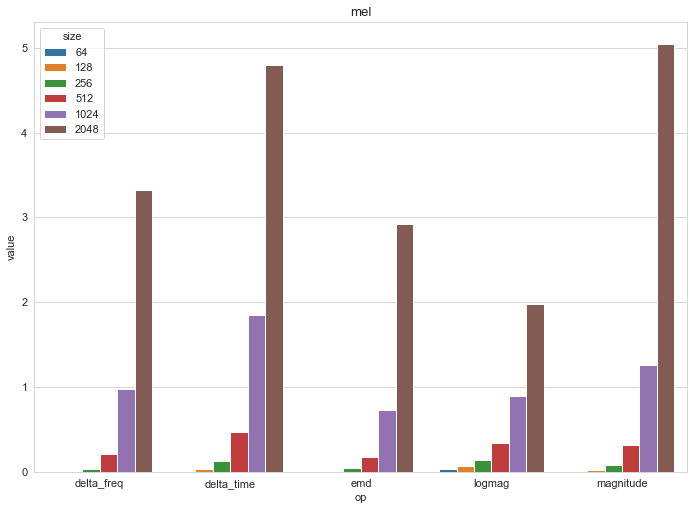

In [36]:
sns.barplot(data=processed_dfs['mel'], x='op', y='value', hue='size').set(title='mel')
plt.show()

# sns.barplot(data=processed_dfs['spectrogram'], x='op', y='value', hue='size').set(title='spectrogram')